<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

## Equality constraints


Let's start by addressing the topic of **optimization with equality constraints**.

In optimization, we seek to find the optimal values of a set of variables (known as decision variables) that maximize or minimize an objective function, **subject** to certain constraints. In the case of equality constraints, these are expressed as equations that must be satisfied exactly.

Formally, an optimization problem with equality constraints can be defined as follows:

$$
\min f(\mathbf{x}) \\
\text{subject to } g(\mathbf{x}) = 0
$$

In this representation, $\mathbf{x}$ denotes a vector.
where:
- $f(x)$ is the objective function that we want to minimize or maximize.
- $\mathbf x = (x_1, x_2, ..., x_n)$ is a vector of decision variables.
- $g(\mathbf x) = (g_1(\mathbf x), g_2(\mathbf x), ..., g_m(\mathbf x))$ is a vector of $m$ constraint functions that must be equal to zero.

The goal is to find the values of the decision variables $\mathbf x$ that satisfy the equality constraints and minimize (or maximize) the objective function $f(x)$.

A common approach to solving such problems is by using the method of **Lagrange multipliers**. The method of Lagrange multipliers introduces additional variables called *Lagrange multipliers* $\mathbf \lambda$ to transform the optimization problem with equality constraints into an unconstrained optimization problem. The modified objective function is called the Lagrangian function and is defined as:

$$
L(\mathbf x, \lambda) = f(\mathbf x) + \lambda \cdot g(\mathbf x),
$$
where $\lambda = (\lambda_1, \lambda_2, ..., \lambda_m)$ are the Lagrange multipliers corresponding to the \(m\) equality constraints.

To find the optimal values of $\mathbf x$ and \mathbf \lambda$, the following conditions must be satisfied:

1. The partial derivative of $L(\mathbf x, \lambda)$ with respect to each decision variable $x_i$ must be equal to zero:
$$
  \frac{\partial L}{\partial x_i} = 0\;\;\text{for}\;\; i = 1, 2, ..., n.
$$
2. The partial derivatives of $L(\mathbf x, \lambda)$ with respect to the Lagrange multipliers $\lambda_i$ must be equal to zero:
$$
   \frac{\partial L}{\partial \lambda_i} = 0\;\; \text{for}\;\; i = 1, 2, ..., m.
$$
These conditions lead to a system of nonlinear equations called the **Karush-Kuhn-Tucker (KKT)** equations. Solving this system of equations will give us the optimal values of the decision variables $\mathbf x$ and the Lagrange multipliers $\lambda$


<ipython-input-36-be806b42108c>:39: UserWarning:

The following kwargs were not used by contour: 'label'



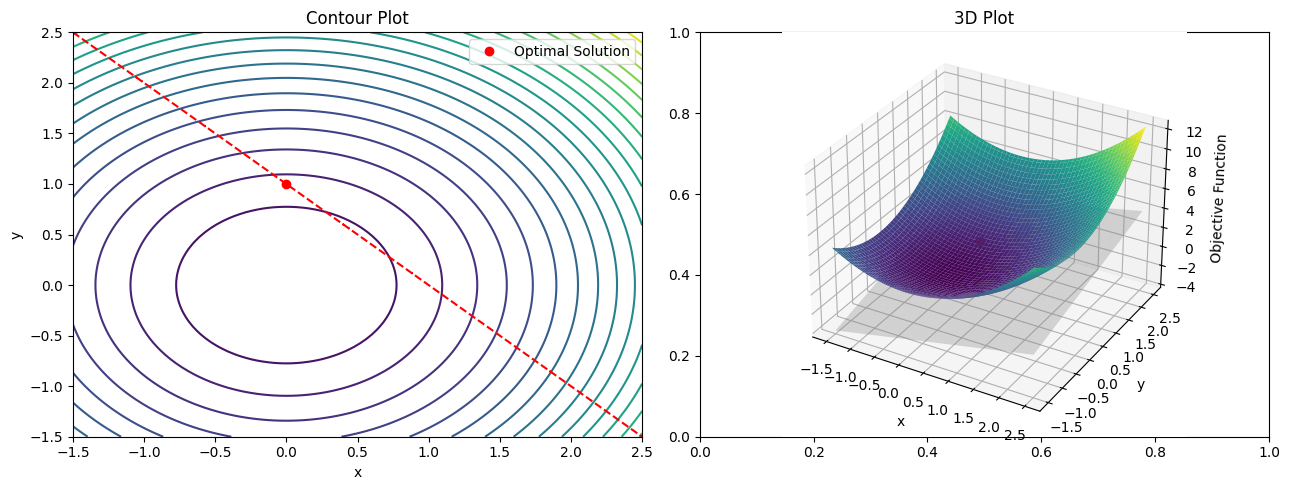

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import plotly.graph_objects as go

# Define the objective function
def objective(x):
    return x[0]**2 + x[1]**2  # Minimize x^2 + y^2

# Define the equality constraint function
def constraint(x):
    return x[0] + x[1] - 1  # Constraint: x + y = 1

# Define the Lagrangian function
def lagrangian(x, lambda_):
    return objective(x) + lambda_[0] * constraint(x)

# Define the gradient of the Lagrangian function
def lagrangian_gradient(x, lambda_):
    grad_obj = [2*x[0], 2*x[1]]  # Gradient of the objective function
    grad_constraint = [1, 1]     # Gradient of the constraint function
    return [grad_obj[i] + lambda_[0] * grad_constraint[i] for i in range(len(x))]

optimal_x = [0.0, 1.0]
optimal_lambda = -2.0


# Plot the optimization problem with constraint in 2D (Contour plot)
x = np.linspace(-1.5, 2.5, 100)
y = np.linspace(-1.5, 2.5, 100)
X, Y = np.meshgrid(x, y)
Z = objective([X, Y])

fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# Contour plot
axs[0].contour(X, Y, Z, levels=20, cmap='viridis')
axs[0].plot([optimal_x[0]], [optimal_x[1]], 'ro', label='Optimal Solution')
axs[0].contour(X, Y, X + Y - 1, levels=[0], colors='r', linestyles='dashed', label='Constraint')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Contour Plot')
axs[0].legend()

# 3D plot
axs[1] = fig.add_subplot(122, projection='3d')
axs[1].plot_surface(X, Y, Z, cmap='viridis')
axs[1].plot([optimal_x[0]], [optimal_x[1]], [1.0], 'ro', label='Optimal Solution')
axs[1].plot_surface(X, Y, X + Y - 1, alpha=0.3, color='gray', label='Constraint')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_zlabel('Objective Function')
axs[1].set_title('3D Plot')
#axs[1].legend()

plt.tight_layout()
plt.show()

## Covariance matrix

The covariance matrix is a fundamental concept in statistics and data analysis. It provides valuable information about the relationships and variability between variables in a dataset.

In the context of multivariate data, the covariance matrix is a square matrix that summarizes the pairwise covariances between the variables. Let's say we have a dataset with $n$ variables, represented by a matrix $X$ of shape $(m, n)$, where $m$ is the number of observations and $n$ is the number of variables. The covariance matrix, denoted as $C$, is a $(n, n)$ matrix, and its elements are calculated as follows:

<br>
$$
C = \begin{bmatrix}
    \text{cov}(X_1, X_1) & \text{cov}(X_1, X_2) & \cdots & \text{cov}(X_1, X_n) \\
    \text{cov}(X_2, X_1) & \text{cov}(X_2, X_2) & \cdots & \text{cov}(X_2, X_n) \\
    \vdots & \vdots & \ddots & \vdots \\
    \text{cov}(X_n, X_1) & \text{cov}(X_n, X_2) & \cdots & \text{cov}(X_n, X_n)
\end{bmatrix}
$$
<br>

where $\text{cov}(X_i, X_j)$ represents the covariance between variables $X_i$ and $X_j$.

The covariance between two variables measures how they vary together. It is calculated as the average of the product of the differences from their means. Mathematically, the covariance between variables $X_i$ and $X_j$ is given by:

<br>
$$
\text{cov}(X_i, X_j) = \frac{1}{m-1} \sum_{k=1}^{m} (X_{k,i} - \bar{X}_i)(X_{k,j} - \bar{X}_j)
$$
<br>
where $X_{k,i}$ and $X_{k,j}$ represent the values of variables $X_i$ and $X_j$ in the $k$th observation, and $\bar{X}_i$ and $\bar{X}_j$ represent their sample means, respectively.

The covariance matrix provides several important insights:

1. **Diagonal Elements**: The diagonal elements of the covariance matrix represent the variances of the individual variables. For example, $\text{cov}(X_i, X_i)$ represents the variance of variable $X_i$. Higher values indicate greater variability.

2. **Off-Diagonal Elements**: The off-diagonal elements of the covariance matrix represent the covariances between pairs of variables. Positive values indicate a positive linear relationship, while negative values indicate a negative linear relationship. The magnitude of the value indicates the strength of the relationship.

3. **Symmetry**: The covariance matrix is symmetric since $\text{cov}(X_i, X_j) = \text{cov}(X_j, X_i)$.

The covariance matrix is widely used in various statistical and machine learning techniques. It plays a crucial role in principal component analysis (PCA), linear regression, and many other statistical methods.

In practice, the covariance matrix can be estimated from a sample dataset to provide insights into the relationships and variability between variables.

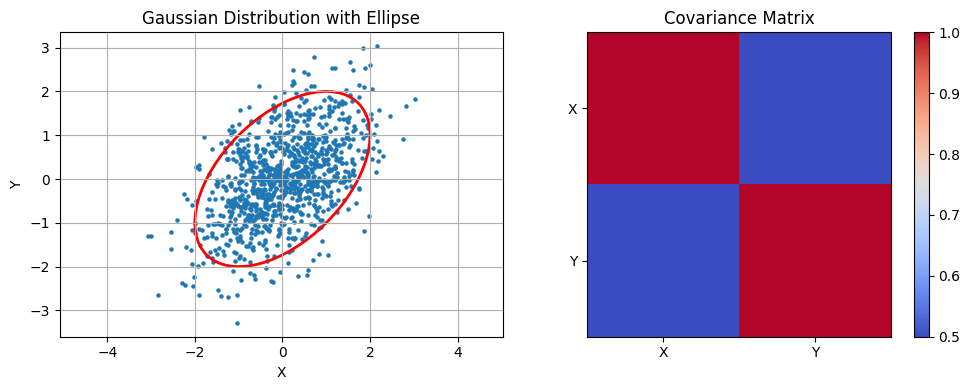

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Parameters of the Gaussian distribution
mean = [0, 0]              # Mean of the distribution
covariance = [[1, 0.5],    # Covariance matrix
              [0.5, 1]]

# Generate random samples from the Gaussian distribution
np.random.seed(0)
samples = np.random.multivariate_normal(mean, covariance, 1000)

# Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance)

# Get the angle of rotation from the eigenvectors
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

# Create the ellipse
factor = 4.0
ellipse = Ellipse(xy=mean, width=factor*np.sqrt(eigenvalues[0]),
                  height=factor*np.sqrt(eigenvalues[1]), angle=angle,
                  edgecolor='r', fc='None', lw=2)

# Plot the samples and ellipse
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Scatter plot
ax1.scatter(samples[:, 0], samples[:, 1], s=5)
ax1.add_patch(ellipse)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Gaussian Distribution with Ellipse')
ax1.axis('equal')
ax1.grid(True)

# Heatmap plot
heatmap = ax2.imshow(covariance, cmap='coolwarm')
cbar = plt.colorbar(heatmap, ax=ax2)
ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(2))
ax2.set_xticklabels(['X', 'Y'])
ax2.set_yticklabels(['X', 'Y'])
ax2.set_title('Covariance Matrix')
plt.tight_layout()

plt.show()


## PCA (the flavors)

Here's an explanation of the two formulations of PCA (variance and error approximation) along with their advantages and disadvantages:

1. Variance Formulation:
   The variance formulation of PCA aims to find the directions (principal components) along which the data has the maximum variance. It seeks to retain the most important information in the data by preserving the directions that capture the most significant variability.

   Advantages:
   - It emphasizes capturing the global structure of the data by preserving the directions with high variance.
   - It provides a clear interpretation of the principal components as the directions of maximum variability in the data.
   - It is computationally efficient and straightforward to implement.

   Disadvantages:
   - It may not consider the specific relationships or correlations between features, as it primarily focuses on variance.
   - It may not be optimal for datasets where the directions with high variance are not necessarily the most informative ones.
   - It does not directly consider the reconstruction error or the ability to approximate the original data accurately.

2. Error Approximation Formulation:
   The error approximation formulation of PCA aims to find a low-dimensional subspace that minimizes the reconstruction error between the original data and its approximations. It seeks to retain the most important information in the data by minimizing the loss of information during dimensionality reduction.

   Advantages:
   - It explicitly considers the reconstruction error, ensuring that the low-dimensional representations capture the essential information in the data.
   - It can effectively capture complex relationships and correlations between features, as it focuses on reconstructing the original data.
   - It provides a more accurate approximation of the original data by optimizing the reconstruction error.

   Disadvantages:
   - It may not capture the global structure of the data as well as the variance formulation, as it prioritizes reconstruction accuracy over global variability.
   - It can be more computationally intensive compared to the variance formulation, especially for large datasets.
   - It may not provide a clear interpretation of the principal components, as the emphasis is on reconstruction rather than capturing maximum variance.

Both formulations have their strengths and weaknesses, and the choice depends on the specific goals and characteristics of the dataset. The variance formulation is suitable when the global structure and variability of the data are of primary interest, while the error approximation formulation is more appropriate when accurate reconstruction of the original data is crucial. It's important to consider the trade-offs between capturing variance and minimizing reconstruction error when applying PCA in different scenarios.


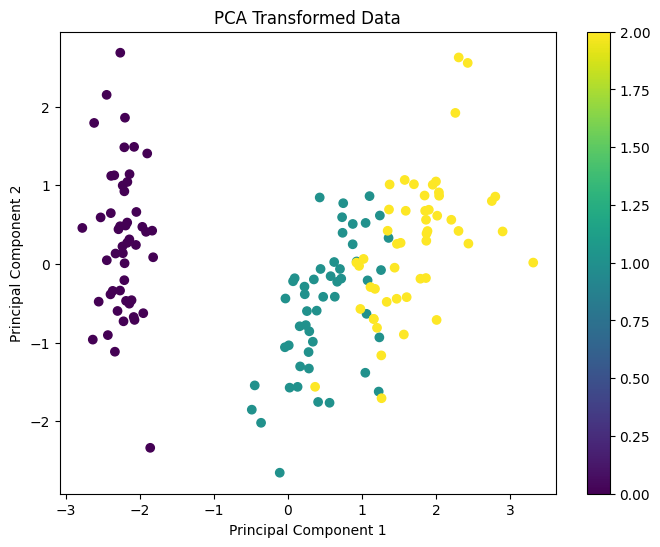

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))

# Apply the pipeline to the data
X_pca = pipeline.fit_transform(X)

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.colorbar()
plt.show()


## Problem formulation (error aproximation)
Suppose we have an **unlabeled** dataset, denoted as $D = \{\mathbf x_n : n = 1:N\}$, where each $\mathbf x_n$ is a data point in $\mathbb{R}^D$. We can represent this dataset as an $N \times D$ data matrix, denoted as $X$. To simplify the analysis, we assume that the dataset is centered, which means that the mean of the data points is zero:
$$
\bar{\mathbf x} = \frac{1}{N}\sum_{n=1}^N\mathbf x_n = 0.
$$
This centering step ensures that the data is normalized around the origin.

Our goal is to find a low-dimensional representation for each data point $\mathbf x_n$. We want to approximate each $\mathbf x_n$ using a linear combination of basis functions $\mathbf w_1, \dots, \mathbf w_L$, where each $\mathbf w_k$ is a vector in $\mathbb{R}^D$. The weights for this linear combination are given by $\mathbf z_n$, which is a vector in $\mathbb{R}^L$. Therefore, we assume that each $\mathbf x_n$ can be approximated as follows:
$$
\mathbf x_n \approx \sum_{k=1}^{L} z_{nk}\mathbf w_k.
$$
Here, $\mathbf z_n$ represents the low-dimensional representation or the latent vector for $\mathbf x_n$. It consists of latent or "hidden" values that are not directly observed in the original data. The set of these latent variables is known as the latent factors.

In summary, our objective in PCA is to find the optimal values for $\mathbf z_n$ and $w_k$ that minimize the reconstruction error between the original data points $\mathbf x_n$ and their low-dimensional approximations. By finding the appropriate values for $\mathbf z_n$ and $w_k$, we can effectively capture the essential structure and patterns in the data while reducing its dimensionality.

The error cost function is given by:
$$
E(W,Z)=\frac{1}{N}||X-WZ||_F^2=\frac{1}{N}||X^T-Z^TW||_{F}^2=\frac{1}{N}\sum_{n}^{N}||\mathbf{x}_n-W\mathbf{z}_n||^2
$$
where the rows of $Z$ contain the low dimension versions of the rows of $X$. This is known as the (average) reconstruction error, since we are approximating each $\mathbf x_n$ by ${\hat{\mathbf x}}_n = W\mathbf z_n$.

## Latent factors

In PCA, the concept of hidden variables, also known as latent variables or latent factors, refers to the unobserved or underlying factors that explain the structure and patterns in the data. These hidden variables are represented by the low-dimensional representations of the data points, known as the latent vectors or the principal components.

In the context of PCA, the goal is to find a reduced-dimensional representation of the data that captures the most essential information while minimizing the loss of information. This is achieved by identifying a set of orthogonal directions, called principal components, along which the data exhibits the maximum variability.

Each principal component can be viewed as a linear combination of the original features or attributes of the data. These linear combinations are determined by the weights assigned to each feature, which are the coefficients of the principal components. These weights are the projections of the original data points onto the corresponding principal components.

The latent variables or hidden variables correspond to the coefficients of the principal components. They capture the unobserved factors or hidden patterns in the data that are responsible for the observed variation. These factors might represent underlying trends, relationships, or structural components that are not directly apparent in the original data.

The latent variables play a crucial role in PCA as they enable us to represent the data in a lower-dimensional space while preserving the most important information. By focusing on the latent variables, PCA provides a compact and informative representation of the data that can facilitate analysis, visualization, and further modeling.

In summary, the concept of hidden variables in PCA refers to the unobserved factors or latent factors that are responsible for the observed patterns and variability in the data. The principal components, which are the low-dimensional representations of the data, capture these hidden variables and enable us to understand and analyze the underlying structure of the data.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


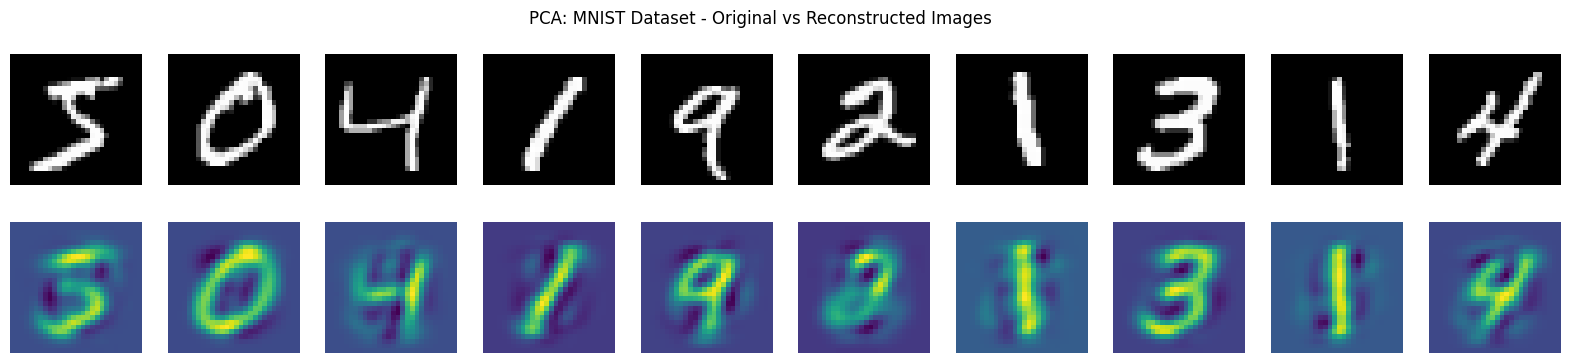

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract the features (pixel values) and labels
X = mnist.data
y = mnist.target

# Perform PCA with 50 components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

# Reconstruct the data from the transformed components
X_reconstructed = pca.inverse_transform(X_pca)

# Plot a subset of the original images and their reconstructions
n_images = 10
plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Original image
    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(X.iloc[i].to_numpy().reshape(28,28), cmap='gray')
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n_images, i + n_images + 1)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='viridis')
    ax.axis('off')

plt.suptitle('PCA: MNIST Dataset - Original vs Reconstructed Images')
plt.show()

In [ ]:
pca.components_.shape

(20, 784)

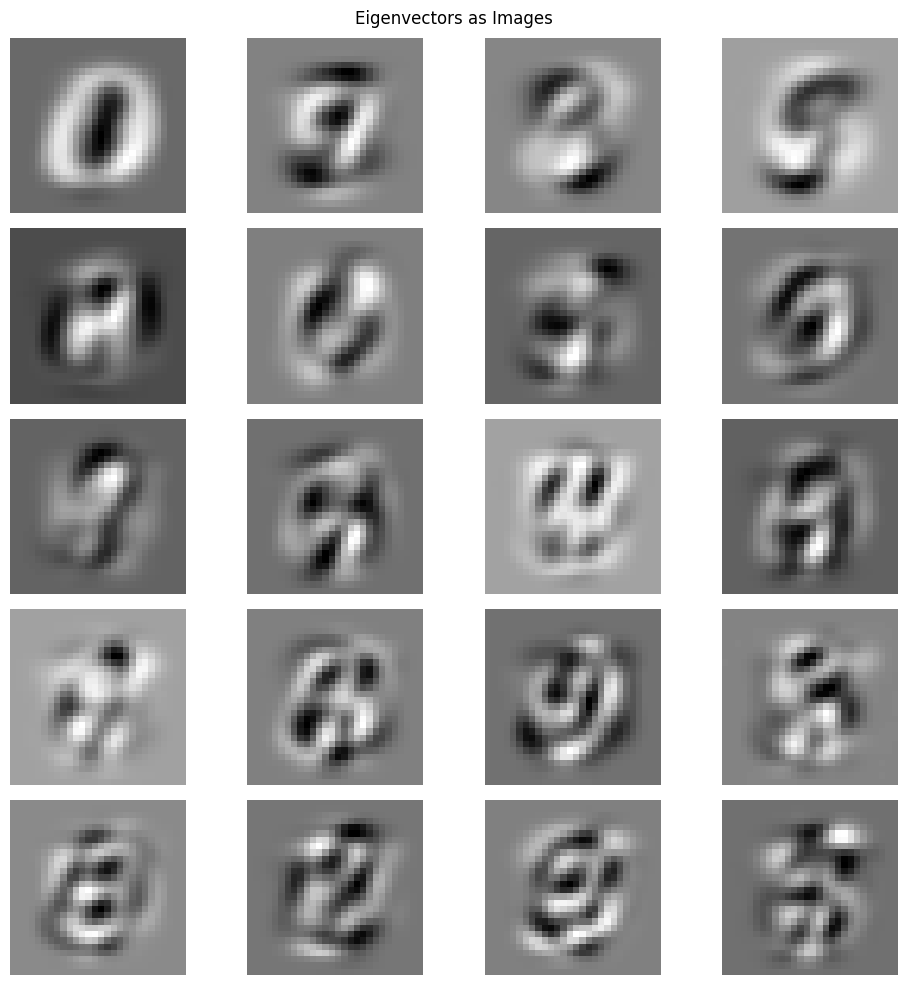

In [ ]:
# Get the eigenvectors
eigenvectors = pca.components_

# Plot the eigenvectors as images
n_eigenvectors = eigenvectors.shape[0]
n_rows = int(np.ceil(np.sqrt(n_eigenvectors)))
n_cols = int(np.ceil(n_eigenvectors / n_rows))

plt.figure(figsize=(10, 10))
for i in range(n_eigenvectors):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(eigenvectors[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.suptitle('Eigenvectors as Images')
plt.tight_layout()
plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


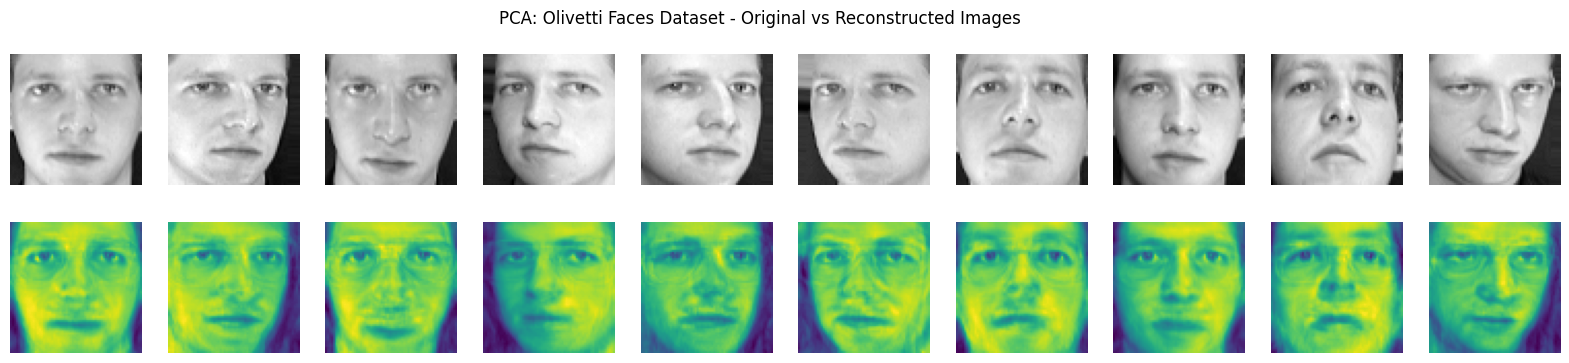

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti Faces dataset
faces = fetch_olivetti_faces()

# Extract the images and labels
X = faces.data
y = faces.target



# Perform PCA with 64 components (same as original dimension)
pca = PCA(n_components=64)
X_pca = pca.fit_transform(X)

# Reconstruct the data from the transformed components
X_reconstructed = pca.inverse_transform(X_pca)

# Plot a subset of the original images and their reconstructions
n_images = 10
plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Original image
    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(X[i].reshape(64, 64), cmap='gray')
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n_images, i + n_images + 1)
    plt.imshow(X_reconstructed[i].reshape(64, 64), cmap='viridis')
    ax.axis('off')

plt.suptitle('PCA: Olivetti Faces Dataset - Original vs Reconstructed Images')
plt.show()


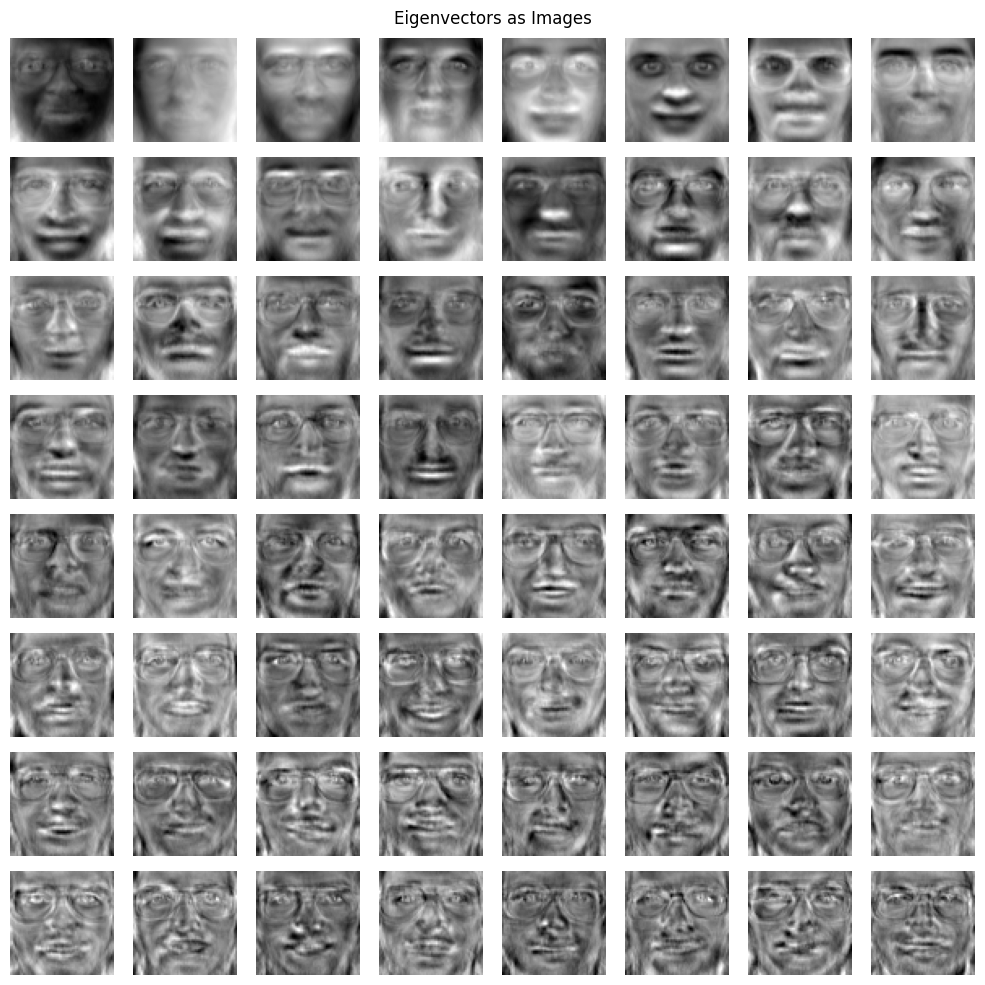

In [ ]:
# Get the eigenvectors
eigenvectors = pca.components_

# Plot the eigenvectors as images
n_eigenvectors = eigenvectors.shape[0]
n_rows = int(np.ceil(np.sqrt(n_eigenvectors)))
n_cols = int(np.ceil(n_eigenvectors / n_rows))

plt.figure(figsize=(10, 10))
for i in range(n_eigenvectors):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(eigenvectors[i].reshape(64, 64), cmap='gray')
    ax.axis('off')

plt.suptitle('Eigenvectors as Images')
plt.tight_layout()
plt.show()